In [1]:
import pandas as pd

In [2]:
A = pd.read_csv("C:/Users/Admin/Downloads/AirPassengers.csv")

In [3]:
A.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [4]:
A.shape

(144, 2)

In [5]:
A.Date = pd.to_datetime(A.Month,format="%Y-%m")

<ipython-input-5-45fc302b8a4c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.Date = pd.to_datetime(A.Month,format="%Y-%m")


In [6]:
A.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [7]:
A.index = A.Date

In [8]:
A.head(2)

,Month,#Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118


In [9]:
A = A.drop (labels=["Month"],axis = 1)

In [10]:
A.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


In [11]:
import matplotlib.pyplot as plt

# Visulaize Original time series

Text(0, 0.5, 'No. of Passengers')

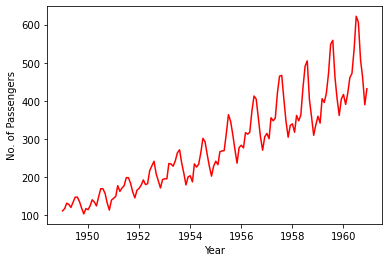

In [12]:
plt.plot(A,c="red")
plt.xlabel("Year")
plt.ylabel("No. of Passengers")

Air passengers data from 1949 to 1961 show significant upward growth of passengers.

# To visualize components of time series

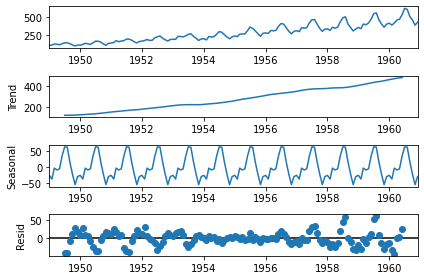

In [13]:
from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()
plt.show()

# Standardization of Time-Series

In [14]:
import numpy as np

In [15]:
LOGGED_DF = pd.DataFrame(np.log(A['#Passengers']))

<ipython-input-16-e8871915ff00>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(A,C='red')


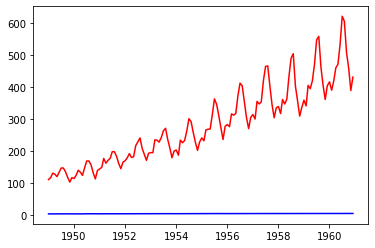

In [16]:
# comparing original time-series and standardise time-series
plt.plot(A,C='red')
plt.plot(LOGGED_DF,c='blue')
plt.xlabel=('Year')
plt.ylabel = ("No. of passengers")

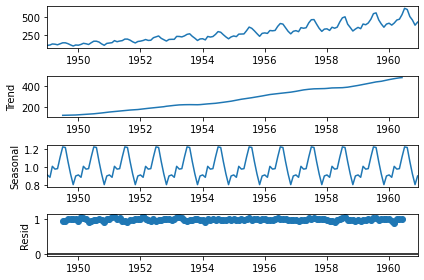

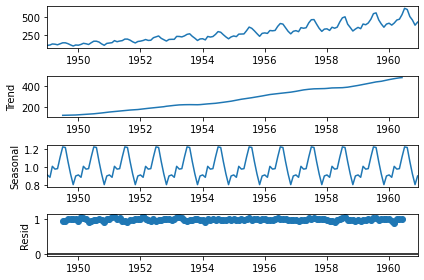

In [17]:
# Decompose Time-series based on Seasons 
import statsmodels.api as sm
sm.tsa.seasonal_decompose(A,model = "multiplicative").plot()

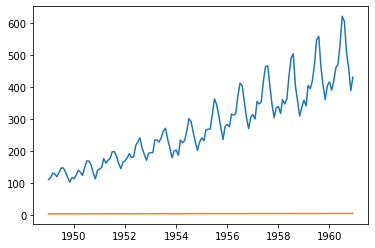

In [18]:
plt.plot(A)
plt.plot(LOGGED_DF)

In [19]:
LOGGED_DF

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


# To check whether data has been converted to stationary using rolling mean
Comparing original time-series rolling mean and standardise rolling mean

In [20]:
rm = A.rolling(window=12).mean()
rstd = A.rolling(window=12).std()

In [21]:
rm

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


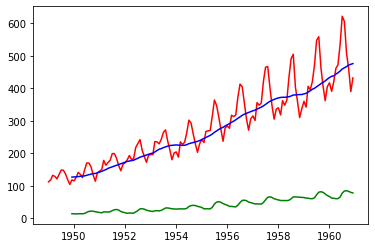

In [22]:
plt.plot(A,c="red")
plt.plot(rm,c="blue")
plt.plot(rstd,c="green")

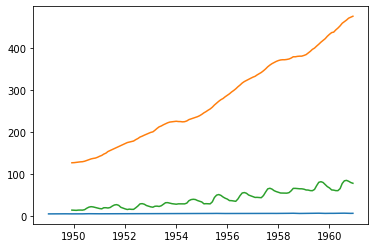

In [23]:
plt.plot(LOGGED_DF)
plt.plot(rm)
plt.plot(rstd)

In [24]:
LOGGED_DF = pd.set_option('display.max_rows',144)

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [26]:
#Improving rolling mean using better standardisation than log that is Z-score
STD_DF = pd.DataFrame(ss.fit_transform(A[['#Passengers']]),columns=['passengers'],index=A.index)

In [27]:
STD_DF.head(10)

,passengers
Month,
1949-01-01,-1.407779
1949-02-01,-1.357590
1949-03-01,-1.240483
1949-04-01,-1.265578
1949-05-01,-1.332496
1949-06-01,-1.215389
1949-07-01,-1.106647
1949-08-01,-1.106647
1949-09-01,-1.207024


In [28]:
rm = STD_DF.rolling(window=12).mean()
rstd = STD_DF.rolling(window=12).std()

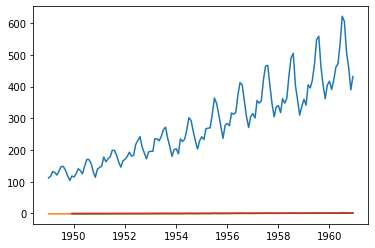

In [29]:
plt.plot(A)
plt.plot(STD_DF)
plt.plot(rm)
plt.plot(rstd)


In [30]:
# Numeric way of testing p-value
from statsmodels.tsa import adfvalues

In [38]:
from statsmodels.tsa.stattools import adfuller
adfuller(A["#Passengers"])[1]

0.9918802434376409

In [40]:
from statsmodels.tsa.stattools import adfuller
adfuller(LOGGED_DF["#Passengers"])[1]

TypeError: 'NoneType' object is not subscriptable

In [41]:
from statsmodels.tsa.stattools import adfuller
adfuller(STD_DF['passengers'])[1]

0.9918802434376411

In [42]:
# diff of Log and mean
rm = A.rolling(window=12).mean()
w = np.log(A)-rm

In [43]:
w

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [44]:
w = w[w['#Passengers'].isna()!= True] # To remove null values

In [45]:
w

,#Passengers
Month,
1949-12-01,-121.895982
1950-01-01,-122.171735
1950-02-01,-122.747051
1950-03-01,-123.384573
1950-04-01,-123.928059
1950-05-01,-124.338353
1950-06-01,-125.329387
1950-07-01,-127.030868
1950-08-01,-128.864202


In [46]:
from statsmodels.tsa.stattools import adfuller
adfuller(w['#Passengers'])[1]

0.9921114303164102

In [ ]:
#According to adfuller test none of standardization are stationary

In [47]:
Q = np.log(A) - rm
adfuller(w['#Passengers'])[1]

0.9921114303164102

In [48]:
import numpy as np
Alog = np.log(A)

In [49]:
Alog

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


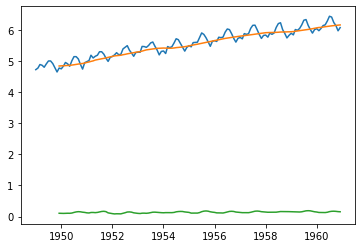

In [50]:
rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation
plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

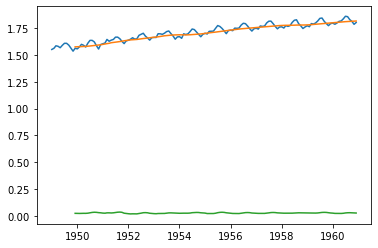

In [53]:
Alog = np.log(np.log(A))

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviation

plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaledA = pd.DataFrame(ss.fit_transform(A),index=A.index,columns=A.columns)

rm = scaledA.rolling(window=12).mean() #rolling mean
rstd = scaledA.rolling(window=12).std() #rolling standard deviation



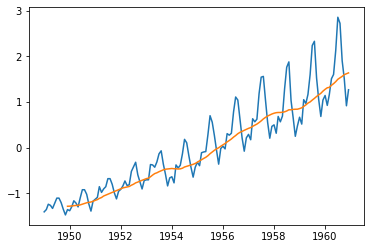

In [54]:
plt.plot(scaledA)
plt.plot(rm)
#plt.plot(rstd)

In [55]:
from statsmodels.tsa.stattools import adfuller
q = adfuller(Alog["#Passengers"])

In [56]:
pval = q[1]
pval

0.22258989117061467

In [57]:
import numpy as np
Alog = np.log(np.log(A))

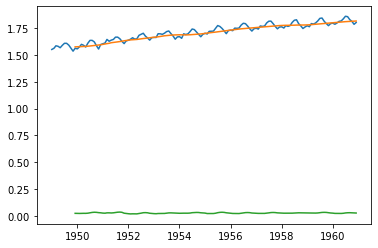

In [59]:
import numpy as np
Alog = np.log(np.log(A))

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation


plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

In [58]:
Alog

,#Passengers
Month,
1949-01-01,1.551491
1949-02-01,1.562490
1949-03-01,1.585719
1949-04-01,1.581000
1949-05-01,1.567739
1949-06-01,1.590311
1949-07-01,1.608880
1949-08-01,1.608880
1949-09-01,1.591815


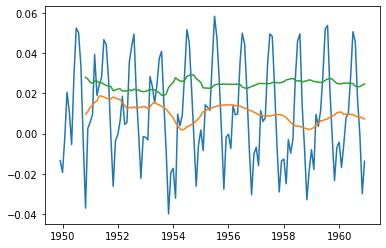

In [60]:
q = Alog-rm

import numpy as np


rm = q.rolling(window=12).mean() #rolling mean
rstd = q.rolling(window=12).std() #rolling standard deviatation


plt.plot(q)
plt.plot(rm)
plt.plot(rstd)

In [62]:
adfuller(q["#Passengers"][~q["#Passengers"].isna()])[1]

0.04044134645742491

In [63]:
A.shape

(144, 1)

In [64]:
A.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

forecasting using AR Model

In [65]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

In [66]:
trd

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [67]:
tsd

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


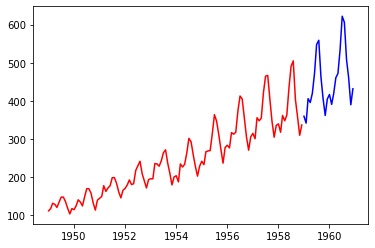

In [68]:
plt.plot(trd,c="red")
plt.plot(tsd,c="blue")

In [69]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1959-01-01",end="1960-12-01")
tsd['Forecasted_from_AR']=pred

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [72]:
from sklearn.metrics import mean_squared_error
print("MSE = %.2f"%mean_squared_error(tsd["#Passengers"],tsd.Forecasted_from_AR))

MSE = 1814.01


In [73]:
tsd

,#Passengers,Forecasted_from_AR
Month,,
1959-01-01,360,346.387361
1959-02-01,342,320.446670
1959-03-01,406,370.614512
1959-04-01,396,350.715553
1959-05-01,420,381.196946
1959-06-01,472,464.228410
1959-07-01,548,530.961303
1959-08-01,559,546.633624
1959-09-01,463,433.801565
